In [30]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt 

%matplotlib inline

In [31]:
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.7.0
TensorFlow 2.0 Hello World


In [32]:
from sklearn.datasets import load_boston
data1 = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [33]:
df = pd.DataFrame(data1['data'],
                  columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                           'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [34]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler

x = df.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=data1['feature_names'])

In [36]:
df['target'] = data1['target']

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('target', 1)
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

# Обучение модели

In [122]:
result = pd.DataFrame(columns= ['layers','neurons','epochs', 'activation', 'loss_mse', 'metrics_mae' ])
result

,layers,neurons,epochs,activation,loss_mse,metrics_mae


In [145]:
n = 32
e = 2
activ = 'sigmoid'
epoch = 120
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[-1],)),
    keras.layers.Dense(n, activation=activ),
    keras.layers.Dense(n, activation=activ),
    keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='sgd',
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss= 'mse',
              metrics=['mae'])
model.fit(X_train, y_train, epochs=epoch, validation_split=0.2)
# model_all.evaluate(X_test,y_test)
result.loc[len(result.index)] = [e,
                                 n,
                                 epoch,
                                 activ,
                                round(model.evaluate(X_test,y_test)[0],4),
                                round(model.evaluate(X_test, y_test)[1],4) ]

Epoch 1/120
11/11 [==============================] - 0s 18ms/step - loss: 198.5465 - mae: 10.3241 - val_loss: 68.7997 - val_mae: 5.9188
Epoch 2/120
11/11 [==============================] - 0s 4ms/step - loss: 90.0375 - mae: 7.0809 - val_loss: 67.8873 - val_mae: 5.8650
Epoch 3/120
11/11 [==============================] - 0s 4ms/step - loss: 88.4016 - mae: 6.9587 - val_loss: 67.8786 - val_mae: 5.5544
Epoch 4/120
11/11 [==============================] - 0s 4ms/step - loss: 88.0472 - mae: 6.8737 - val_loss: 66.5331 - val_mae: 5.4567
Epoch 5/120
11/11 [==============================] - 0s 5ms/step - loss: 85.5270 - mae: 6.7277 - val_loss: 66.1555 - val_mae: 6.1400
Epoch 6/120
11/11 [==============================] - 0s 4ms/step - loss: 82.2679 - mae: 6.7429 - val_loss: 74.3120 - val_mae: 7.1587
Epoch 7/120
11/11 [==============================] - 0s 4ms/step - loss: 79.2469 - mae: 6.6869 - val_loss: 87.5930 - val_mae: 8.1002
Epoch 8/120
11/11 [==============================] - 0s 4ms/step -

In [146]:
result.head(15)

,layers,neurons,epochs,activation,loss_mse,metrics_mae
0,1,64,120,tanh,20.9509,3.0427
1,2,64,120,tanh,13.2469,2.3069
2,2,512,120,tanh,NaN,NaN
3,4,64,120,tanh,17.1837,2.6258
4,6,64,120,tanh,86.5703,6.3451
5,6,128,120,tanh,NaN,NaN
6,1,64,120,sigmoid,19.6279,3.1208
7,2,64,120,sigmoid,45.0738,5.7014
8,2,32,120,tanh,22.7106,3.0231
9,2,32,120,sigmoid,16.2974,2.8040


In [147]:
result.to_csv('result.csv')

# Обучение Моделей и обьеденение по среднему значению


In [ ]:
# заполняем модель списком
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[-1],)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(1, activation='linear')
])

# заполняем модель , добавляя слои последовательно 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(X_train.shape[-1],)))
model2.add(keras.layers.Dense(512, activation='linear'))
model2.add(keras.layers.Dense(1, activation='linear'))


# Заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(X_train.shape[-1],))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(512, activation='relu')(x3)
x_output = keras.layers.Dense(1, activation='linear')(x3)
model3=keras.models.Model(x_input,x_output)

model1.compile(optimizer='sgd',
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss= 'mse',
              metrics=['mae'])
model2.compile(optimizer='rmsprop',
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               loss= 'mse',
              metrics=['mae'])
model3.compile(optimizer='adam',
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               loss= 'mse',
              metrics=['mae'])

hist1=model1.fit(X_train, y_train, epochs=25, batch_size=20, validation_split=0.2)
hist2=model2.fit(X_train, y_train, epochs=25, batch_size=20, validation_split=0.2)
hist3=model3.fit(X_train, y_train, epochs=25, batch_size=20, validation_split=0.2)

Epoch 1/25
17/17 [==============================] - 1s 13ms/step - loss: 761.0510 - mae: 19.0463 - val_loss: 65.2971 - val_mae: 5.1366
Epoch 2/25
17/17 [==============================] - 0s 4ms/step - loss: 79.9319 - mae: 6.6151 - val_loss: 68.0983 - val_mae: 6.5650
Epoch 3/25
17/17 [==============================] - 0s 4ms/step - loss: 80.2643 - mae: 6.6077 - val_loss: 111.1411 - val_mae: 9.3046
Epoch 4/25
17/17 [==============================] - 0s 4ms/step - loss: 71.0674 - mae: 6.3809 - val_loss: 78.6098 - val_mae: 5.8503
Epoch 5/25
17/17 [==============================] - 0s 4ms/step - loss: 70.3738 - mae: 6.0022 - val_loss: 59.0569 - val_mae: 4.7564
Epoch 6/25
17/17 [==============================] - 0s 6ms/step - loss: 68.1966 - mae: 5.9401 - val_loss: 96.9842 - val_mae: 8.5297
Epoch 7/25
17/17 [==============================] - 0s 4ms/step - loss: 67.8367 - mae: 6.1573 - val_loss: 72.2521 - val_mae: 5.5206
Epoch 8/25
17/17 [==============================] - 0s 5ms/step - loss: 

In [ ]:
# сохранить модели на диск.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# прочитать модели с диска (перед этим, нужно положить их в каталог для работы виртуальной машины Колаборатории):
# model.load_weights('model.h5')

In [ ]:
input1 = keras.layers.Input(shape=(X_train.shape[-1],))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(512, activation='relu')(x1)
x1 =keras.layers.Dense(1, activation='linear')(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(512, activation='relu')(x2)
x2=keras.layers.Dense(1, activation='linear')(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(512, activation='relu')(x3)
x3=keras.layers.Dense(1, activation='linear')(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)

# усредняем выходы сетей
out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
# out_all = keras.layers.ReLU()(out_all)

model_all=keras.models.Model(inputs =[input1],outputs =out_all)
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss= 'mse',
              metrics=['mae'])


model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.utils import plot_model

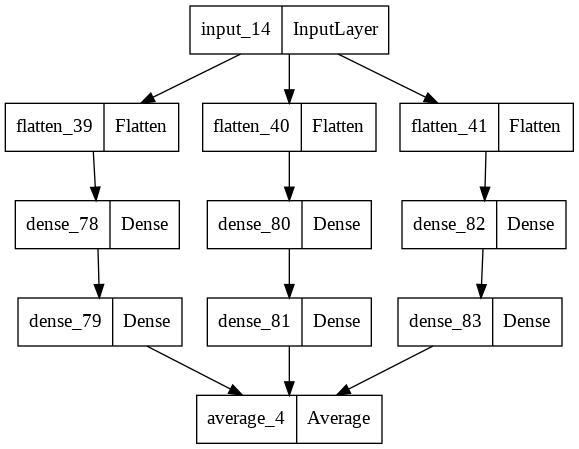

In [ ]:
plot_model(model_all,to_file='new_model-all.png')

In [ ]:
model_all.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 155.5349 - mae: 10.6417


[155.53494262695312, 10.641709327697754]

In [ ]:
y_pred = model_all.predict(X_test)

In [ ]:
y_pred[0]

array([12.664565], dtype=float32)